In [1]:
##### Code catlog 
##### 12/09/2023 - Organize from One-node-final folder. Github has another final version, compare and update later 
#####                          


## Mathmatic Functions

In [2]:
import numpy as np
# centers the opinion vector around 0\n",
def mean_center(op, n):
    ones = np.ones((n, 1))
    x = op - (np.dot(np.transpose(op),ones)/n) * ones
    return x
    
# compute number of edges, m\n
def num_edges(L, n):
    m = 0
    for i in range(n):
        for j in range(n):
            if i > j and L[i,j] < 0:
                m += 1            
    return m
def rank(scores,agent):
    ranks =1
    for i in scores:
        if scores[agent] > scores[i]:
            ranks += 1
        elif scores[agent]  == scores[i]:
            ranks = ranks
    return ranks

# maximizing polarization only: \\bar{z}^T \\bar{z}   
def obj_polarization(A, L, op, n):
    op_mean = mean_center(op, n)
    z_mean = np.dot(A, op_mean) 
    return np.dot(np.transpose(z_mean), z_mean)[0,0] 

# def obj_polarization_1(A, L, op, n):  #z_mean is the same as s_mean - according to Stanford paper theory
#     z = np.dot(A, op) 
#     z_mean = mean_center(z, n)
#     return np.dot(np.transpose(z_mean), z_mean)[0,0] 

# Calculate innate polarization
def obj_innate_polarization(s, n):  
#     np.set_printoptions(precision=5)
    op_mean = mean_center(s, n)
    return np.dot(np.transpose(op_mean), op_mean)[0,0]
# Parameters for the network


def network_anl(s,n,G,agent):

    print(str(agent)+' opinion: ' + str(s[agent]))
    print(str(agent)+' neighbors: '+ str(np.nonzero(G[agent])))

    s_aa = s[:, 0]
    my_dict = {index: value for index, value in enumerate(s_aa)}
    sorting_s = sorted(my_dict.items(), key=lambda x:x[1])
    sorted_S = dict(sorting_s)
    res = rank(sorted_S,agent)
    # printing result 
    print("Opinion rank of this agent is : " + str(res))



    #print("___________________Max Analyze__________________________________________")
    nxG = nx.from_numpy_matrix(G) 
    # G = nx.karate_club_graph()
    print("_______________Degree Centrality___________________")  
    deg_centrality = nx.degree_centrality(nxG)
    sortedDict = sorted(deg_centrality.items(), key=lambda x:x[1])
    converted_dict = dict(sortedDict)
    res1 = rank(converted_dict,agent)
    print("rank of this agent is : " + str(res1))
    print(converted_dict[agent])

    # print(converted_dict)
    print("                           ")
    print("_______________Closeness Rank________________________")
    close_centrality = nx.closeness_centrality(nxG)
    sortedDict1 = sorted(close_centrality.items(), key=lambda x:x[1])
    converted_dict1 = dict(sortedDict1)
    res2 = rank(converted_dict1,agent)
    print("rank of this agent is : " + str(res2))
    print(converted_dict1[agent])
    # print(converted_dict1)
    print("                           ")
    print("_______________Page Rank_____________________________")
    pr = nx.eigenvector_centrality(nxG)
    sortedDict3 = sorted(pr.items(), key=lambda x:x[1])
    converted_dict3 = dict(sortedDict3)
    res3 = rank(converted_dict3,agent)
    print("rank of this agent is : " + str(res3))
    print(converted_dict3[agent])
    # print(converted_dict3)

    print("                           ")

    def gap(op, n):
        ones = np.ones((n, 1))
        x = op - (np.dot(np.transpose(op),ones)/n) * ones
        return x

    gap = gap(s,n)
    if gap[agent] < 0:
        my_gap = {index: value for index, value in enumerate(gap) if value<0}
        sorting_gap = sorted(my_gap.items(), key=lambda x:x[1])
        sorted_gap = dict(sorting_gap)
        temp4 = list(sorted_gap.items()) 
        res4 = [idx for idx, key in enumerate(temp4) if key[0]==agent][0]+1
        print("Agent's opinion extremity is ranked as: " + str(res4))
    else:
        my_gap = {index: value for index, value in enumerate(gap) if value>=0}
        sorting_gap = sorted(my_gap.items(), key=lambda x:x[1], reverse=True)
        sorted_gap = dict(sorting_gap)
        temp4 = list(sorted_gap.items()) 
        res4 = [idx for idx, key in enumerate(temp4) if key[0]==agent][0]+1
        print("Agent's opinion extremity is ranked as: " + str(res4))
    print("Agent's min_pref is ranked as: " + str(res4+res1))
np.set_printoptions(precision=3)

## Creating Network
### 1. Import Network


In [46]:
#%run sync_net3.ipynb
%run sync_net4.ipynb
# %run Karate.ipynb
# %run Reddit.ipynb
# %run Twitter.ipynb


There are 21 agents


<Figure size 1440x1440 with 0 Axes>

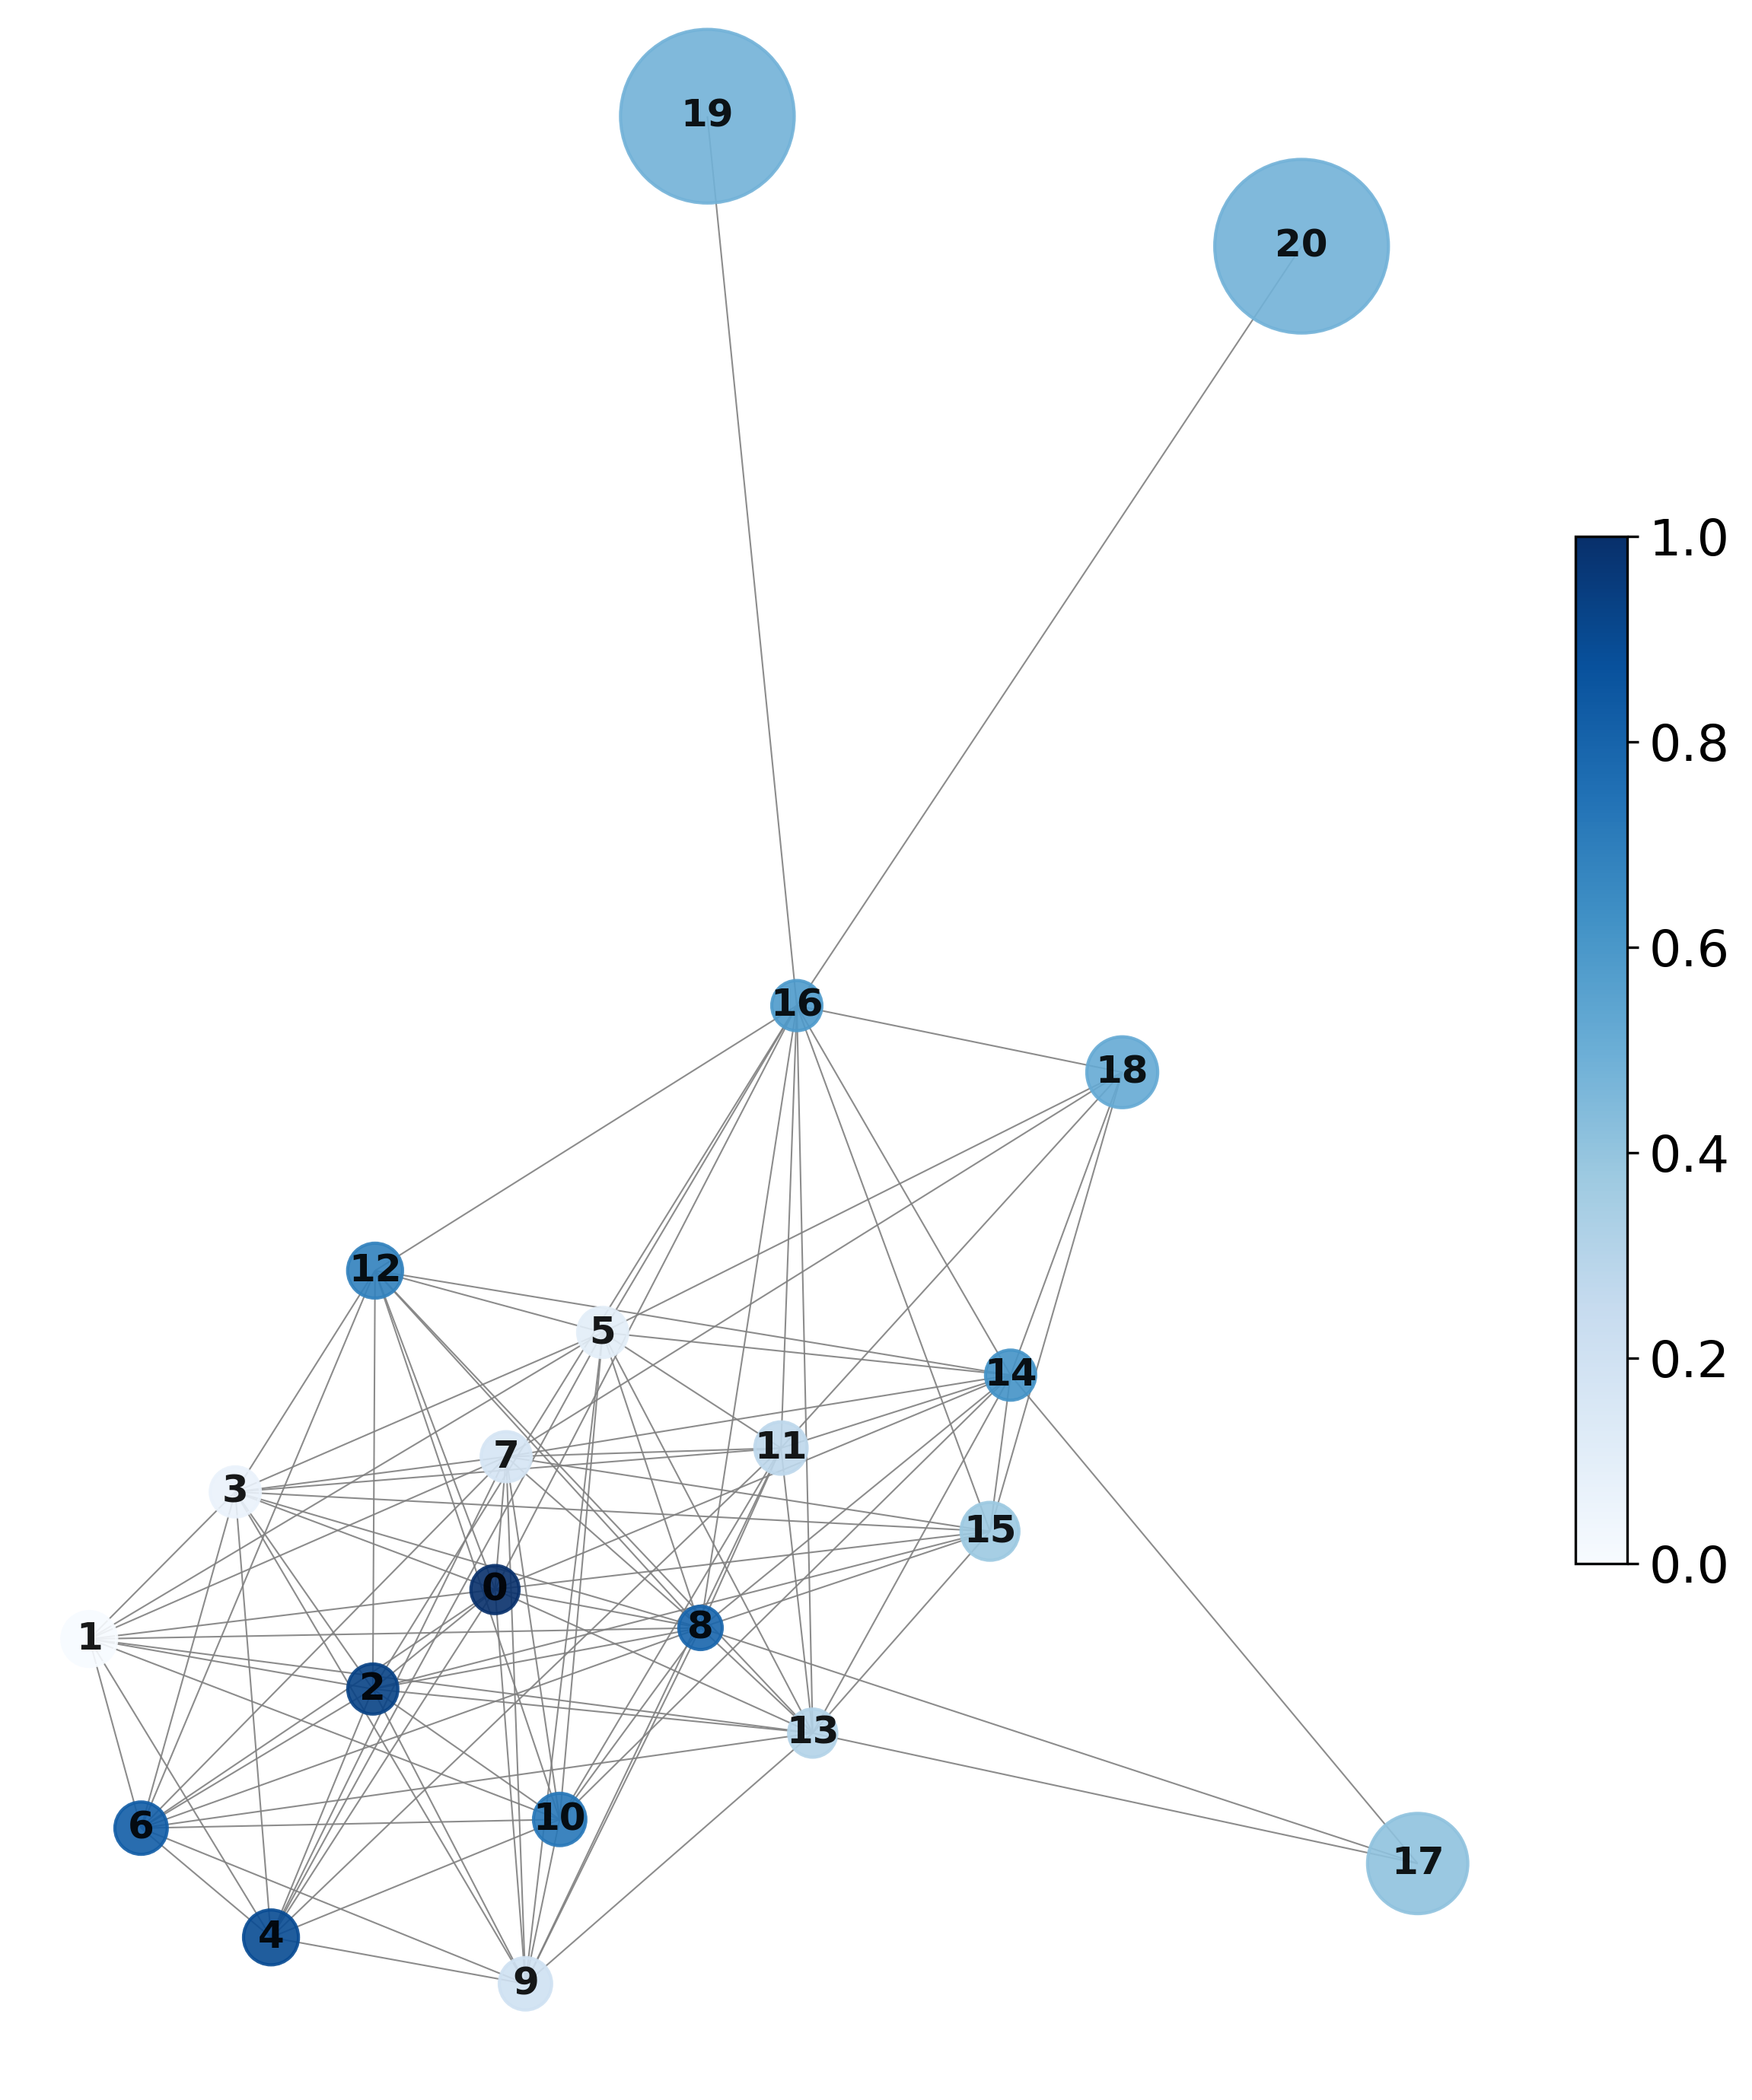

In [168]:
############################ Make Innate Opinion ################################
##create two set of weights connected with density 1) inviduals  2) individual & informaton Source
# print(s)
s_use = s.flatten()   # Convert array to a list for later operation
s_use = s_use.tolist()
new_s = [i * 30 for i in s_use]
df = pd.DataFrame(new_s, columns=['Opinion']) #create a datafram with index at column 1, opinion at column 2

######################### Calculate Key Values & Visualization #######################################3
L = scipy.sparse.csgraph.laplacian(G, normed=False)  # Return the Laplacian matrix
A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)\n  Stanford paper theory
m = num_edges(L, n)                    # call the function to calculate the number of edges
columnsum_ij = np.sum(A, axis=0)
nxG = nx.from_numpy_matrix(G)          
plt.figure(figsize=(20, 20))

def node_edge(G, n):
    edges =[]
    for v in range(n):
        a = np.array(np.nonzero(G[v])[0])
        edge = len(a)
#         print(edge)
        edges.append(edge)
        
    return edges

node_edges = node_edge(G, n)
# node_sizes = node_edges*10


# create color map
color_map = []
for node in nxG:
    if node in min_equi:
        color_map.append('orange')
    elif node in max_equi: 
        color_map.append('Red')  
    else:
        #color_map.append('#1f77b4')  
        color_map.append('grey') 


# create node color map value
s_use = s.flatten()
s_use = s_use.tolist()
new_s = [i * 30 for i in s_use]
df = pd.DataFrame(new_s, columns=['Opinion'])

# crete node sizes
node_sizes =[]
for i in node_edges:
    node_size = 1/i*3000
    node_sizes.append(node_size)
# print(node_sizes)


# draw graph - visualize the network in high resolution
plt.figure(figsize=(8, 9), dpi=300)  # Set the DPI for high resolution
# draw subgraph for highlights
my_pos = nx.spring_layout(nxG, k=0.3, seed = 2)
#my_pos = nx.spring_layout(nxG, seed = 2)
#nx.draw_networkx(G, pos=pos, font_size=16, node_color='blue', font_color='white')
nx.draw(nxG, pos= my_pos,with_labels=True, node_color=df['Opinion'].astype(int), cmap=plt.cm.Blues,node_size= node_sizes, edge_color='grey', width=0.5, font_color='black',font_size=12, font_weight='bold', alpha=0.9)
#nx.draw(nxG, pos = my_pos, with_labels=False, node_color=color_map, node_size= node_sizes, edge_color='grey', width=0.5, font_color='white',font_size=9, font_weight='bold')

sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = 0, vmax=1))
cbar = plt.colorbar(sm, shrink = 0.5)
tick_font_size = 16
cbar.ax.tick_params(labelsize=tick_font_size)
plt.show()

In [109]:
# print("___________________Max Analyze__________________________________________")

# nxG = nx.from_numpy_matrix(G) 
# # G = nx.karate_club_graph()
# print("_______________Degree Centrality_____________________________")  
# plt.figure(figsize =(15, 15))
# deg_centrality = nx.degree_centrality(nxG)
# sortedDict = sorted(deg_centrality.items(), key=lambda x:x[1])
# converted_dict = dict(sortedDict)
# print(converted_dict)
# print("                           ")
# print("_______________Closeness Rank_____________________________")
# close_centrality = nx.closeness_centrality(nxG)
# sortedDict1 = sorted(close_centrality.items(), key=lambda x:x[1])
# converted_dict1 = dict(sortedDict1)
# print(converted_dict1)
# print("                           ")
# print("_______________Page Rank_____________________________")
# pr = nx.eigenvector_centrality(nxG)
# sortedDict3 = sorted(pr.items(), key=lambda x:x[1])
# converted_dict3 = dict(sortedDict3)
# print(converted_dict3)

# print("                           ")

# def gap(op, n):
#     ones = np.ones((n, 1))
#     x = op - (np.dot(np.transpose(op),ones)/n) * ones
#     return abs(x)

# gap = gap(s,n)
# my_gap = {index: value for index, value in enumerate(gap)}
# sorting_gap = sorted(my_gap.items(), key=lambda x:x[1])
# sorted_gap = dict(sorting_gap)
# print(sorted_gap)



### 4. Equilibrium & Polarization  - based on derivation
$$P(z) = z ^T * z $$


In [110]:

## s =  make_innat_opinions(n, c1)
# print('Innate Opinion')
# print(s)
# print('Equilibrium Opinion')
# print(np.dot(A, s))

op = s
y = mean_center(s,n)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('Innate_polarization:')
print(innat_pol)

# Test equilibrium polarization
equ_pol = obj_polarization(A, L, s, n)
print('Equi_polarization:')
print(equ_pol)

di = equ_pol-innat_pol
print("Difference:")
print(di)

Innate_polarization:
1.6630952380952382
Equi_polarization:
0.010966432812542677
Difference:
-1.6521288052826955


### Testing players' behavior

In [111]:
def random_play(s,n):  # player randomly choose an agent and randomly change the agent
    
    op = copy.copy(s)
  
    v = random.randint(0,n-1)  # randomly select an agent index
#     print(v)
    new_op = random.randint(0, 1)  # randomly select an opininon between 0 and 1
#     print(new_op)
    
    # Store old opinion
    old_opinion = op[v,0]
    
    #update the opinion
    op[v,0] = new_op 
#     print('Only 1 opinion changed')
#     print(op)
    print("    "+"Agent" + str(v) +" 's opinion " + str(old_opinion) + " changed to "+ str(new_op))
    por = obj_polarization(A, L, op, n)
    
    #restore op op array to innate opinion
    op[v] = old_opinion
    print("Network reaches equilibrium Polarization: " + str(por))
#     print('Should be restored')
#     print(op)
    return (v, new_op, por)





In [112]:
def random_play1(s,n):  # player randomly choose an agent and randomly change the agent
    
    op = copy.copy(s)
#     max_opi_option = random.uniform(0, 1)   # options that maximizer have
    
    v = random.randint(0,n-1)  # randomly select an agent index
#     print(v)
#     v = 1
    new_op = random.uniform(0, 1)  # randomly select an opininon between 0 and 1
    #new_op = 0
#     print(new_op)
    
    # Store old opinion
    old_opinion = op[v,0]
    
    #update the opinion
    op[v,0] = new_op 
#     print('Only 1 opinion changed')
#     print(op)
    print("    "+"Agent" + str(v) +" 's opinion " + str(old_opinion) + " changed to "+ str(new_op))
    por = obj_polarization(A, L, op, n)
    
    #restore op op array to innate opinion
    op[v] = old_opinion
    print("Network reaches equilibrium Polarization: " + str(por))
#     print('Should be restored')
#     print(op)
    return (v, new_op, por)





In [113]:
## Testing to see if random_play works -- NO NEED TO RUN
# min_touched =[]
# (v1, maxmize_op, innat_equi_por, max_por) = choose_max_vertex(s, n, min_touched)
# print(v1, maxmize_op, innat_equi_por, max_por)

In [114]:
## Testing to see if random_play works -- NO NEED TO RUN
# (v1, max_opinion, max_pol) = random_play(s,n)
# (v2, min_opinion, min_pol) = random_play(s,n)

In [115]:
def maximizer_fir_play(s,n,min_touched):    # maxmizer first-time play, greedy algorithm
    op = copy.copy(s)

    print('Maximizer Play')

    max_champion = choose_max_vertex(op, n, min_touched) # The best choice among all opinions and vertexs, function is in "pure_strategy_selection.ipynb"
    (v1, max_opinion, innate_obj, max_pol) = max_champion # find agent v1, and max_opinion that can maxmize the equi_polarization(max_pol)

    if v1 == None:   # if maximizer cannot find one
        print('Maximizer fail')

    else:
        print("                                ")
        print("Maximizer finds its target agent:")
#         print('v1', 'changed_opinion', 'innate_obj', 'obj')
#         print(max_champion)

        #Store innate_op of the max_selected vertex
        old_opinion_max = op[v1, 0]
        ##### change the agent's opinion with best action(agent v1, max_op)
        op[v1,0] = max_opinion
        ## check if agent's opinionis is changed or not
        print("    "+"Agent" + str(v1) +" 's opinion " + str(old_opinion_max) + " changed to "+ str(max_opinion))
        print("Network reaches equilibrium Polarization: " + str(max_pol))


    return(v1, max_opinion, max_pol)

In [116]:
# max_touched = []
# min_touched = []
# (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)
# print(v1, max_opinion, max_pol)

In [117]:
##### minimizer first-time play, greedy algorithm
def minimizer_fir_play(s,n,max_touched): 
    
    op = copy.copy(s)
    print('_______________________')
    print('Minimizer Play')
#     print('Only 1 opinion changed')
#     print(op)
    
    min_champion = choose_min_vertex(op, n, max_touched)
    (v2, min_opinion, innat_equi_por, min_pol) = min_champion
    
   #Store innate_op of the min_selected vertex
    old_opinion_min = op[v2,0]
    
    if v2 == None:
        print('Minimizer fail')

    else:
        print("                                ")
        print("Minimizer finds its target agent:")

        ##### change the agent's opinion
        op[v2,0] = min_opinion   #-------------------------------------------------> store minimize strategy


        print("    "+"Agent" + str(v2) +" 's opinion " + str(old_opinion_min) + " changed to "+ str(min_opinion))

        print("Network reaches equilibrium Polarization: " + str(min_pol))
#         print('2 opinion changed')
#         print(op)

    return (v2,min_opinion, min_pol)

In [118]:
# max_touched = []
# min_touched = []
# (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)
# print(v2, min_opinion, min_pol)

In [119]:
## Testing above functions
# min_touched=[]
# max_touched=[]
# # Game start from maximizer random play
# print('Maximizer random selection')
# (v1, max_opinion, max_pol) = random_play(s,n)
# max_touched.append(v1)
# # print('v1, max_opinion, max_pol')
# # print(v1, max_opinion, max_pol)
# # store maximizer play history, using agent(row) and changed opinion(column) as indicator to locate history




# # Game start from minimizer random play 
# print('Minimizer random selection')
# (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)
# min_touched.append(v2)



In [120]:
# Row are Column are depended on min and max's choice: agent v and opinion 
def row_index(v2, min_opinion):
    row = 11*v2 + min_opinion*10 
    return int(row)
def column_index(v1,max_opinion):
    column = 2*v1 + max_opinion
    return int(column)  #the python dataframe index

### Mixed Strategy Payoff


In [121]:
def make_payoff_row(op1,v2):
    payoff_row = np.zeros(2*n)

#     print('one opinion changed -min')
#     print(op1)
    for column in range(2*n):
#         print(column)
        v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
        max_opinion = column%2
#         print(v1, max_opinion)
        # update the maximizer's change to the opinion array that has changed by minimizer(op1)
        op2 = copy.copy(op1)
#         temp = op1[v1]
        op2[v1,0] = max_opinion

        # calculate the polarization with both max and min's action
        payoff_row[column] = obj_polarization(A, L, op2, n)
#         op1[v1,0] = temp # restore
#         print(op2,payoff_row[column])

        ############# CAN DELETE 
#         if column==33:
# #         print('max_opinion')
# #         print(v1, max_opinion)
#             print('_________________________Payoff row start')
#             print('two opinion changed -min +  max')
#             print(op2)
        
    # when v1 == v2, the polarization should be negative for max, infinet for min. 
    # Replace the the column_index of agent v2 with 0 for max
    j_1 = 2*v2 + 0
    j_2 = 2*v2 + 1
    payoff_row[j_1] = -100
    payoff_row[j_2] = -100
    
    return payoff_row

In [122]:
# #(1,0) (2,0.3928571428571428)
# op1=copy.copy(s)
# print(op1)

op1 = copy.copy(s)
# print(op1)
op1[2,0] = 1  #op1 is the opinion array that updated by minimizer
# print(op1)
payoff_row_1 = make_payoff_row(op1,2)
print(payoff_row_1)


[ 1.094e-02  1.137e-02  1.160e-02  1.670e-02 -1.000e+02 -1.000e+02
  1.173e-02  1.511e-02  1.390e-02  1.214e-02  1.212e-02  1.308e-02
  1.166e-02  1.267e-02  1.216e-02  1.428e-02  1.239e-02  1.203e-02
  1.218e-02  1.554e-02  1.258e-02  1.315e-02  1.311e-02  1.297e-02
  1.125e-02  1.421e-02  1.228e-02  1.369e-02  1.342e-02  1.273e-02
  1.335e-02  1.497e-02  1.315e-02  1.285e-02  2.729e-02  2.659e-02
  1.948e-02  1.445e-02  7.722e-02  6.867e-02  7.722e-02  6.867e-02]


### Minimizer Mixed Strategy

In [123]:
#NEEDDDDDDD UPDAE

# Calculate polarization of minimizer's Mixed Strategy
def mixed_min_polarization(s,v2,weight_op,fla_max_fre):

    op1 =  copy.copy(s) # make a copy of the innate opinion array 
    op1[v2,0] = weight_op # then only updated by minimizer's current change
#     print('Min update')
#     print(v2, weight_op)
    # calculate the polarization with both min(did here) and max's action(in make_payoff_row)
    payoff_row = make_payoff_row(op1,v2)  # the vector list out 2*n payoffs after min's action combine with 2*n possible max's actions
    #print(payoff_row)

    # Replace the the column_index of agent v2 with 100 for min
    j_1 = 2*v2 + 0
    j_2 = 2*v2 + 1
    payoff_row[j_1] = 100
    payoff_row[j_2] = 100
    
#     print('Min Payoff Row')
#     print(payoff_row)
    #calculate fictitious payoff - equi_min  
    payoff_cal = payoff_row * fla_max_fre # fla_max_fre recorded the frequency of each maximizer's action, frequency sum = 1
                                             # payoff (2*n array) * maximizer_action_frequency (2*n array)
# can DELETE - use to check if function works as expected
#     if v2 ==6 and v1==16:
#         print('Payoff row')
#         column = column_index(16,1)
#         print(payoff_row[column],column)
#         print('fla_max_fre')
#         print(np.nonzero(fla_max_fre))
#         print(fla_max_fre [np.nonzero(fla_max_fre)])
#         print('compare to: '+str(fla_max_fre[column]))
    
    mixed_pol = np.sum(payoff_cal) # add up all, calculate average/expected payoff


#     print('min_mixed_polarization')
#     print(mixed_pol)
        # Replace the the column_index of agent v2 with 100 for min

    payoff_row[j_1] = -100
    payoff_row[j_2] = -100

    return (mixed_pol,payoff_row)


In [124]:
# # op2=op
# # op2[0,0]=1
# # min_opinion1 = derivate_s(op2,n,1)
# # # print(min_opinion1)
# # min_opinion2 = derivate_s1(op2,n,1)
# # print(min_opinion2)
# v2 = 254
# min_opinion = 0
# (mixed_pol, payoff_row) = mixed_min_polarization(s,v2,min_opinion,fla_max_fre)
# print(np.nonzero(fla_max_fre))

In [125]:
def derivate_s(op,n,v2):
               #op - opinion array that updated by maximizer
    c = [1/n] * n
#     print(c)
    sum_term = 0
    j = 0

    sum_term = np.dot(np.dot((A-c),(A[v2]-c)),op)  # sum up all terms
    
    term_out = op[v2]*np.dot((A[v2]-c),(A[v2]-c)) # exclude the term that j = v2
    sum_s = sum_term - term_out    # numerator
    
    s_star = -sum_s/np.dot((A[v2]-c),(A[v2]-c))
    s_star = s_star[0] #take value out of array
    min_opinion =min(max(0,s_star),1)
    
#     print('Min opinion-should be unique')
#     print(min_opinion)
    return min_opinion

# def derivate_s1(op,n,v2):
#                #op - opinion array that updated by maximizer
#     c = [1/n] * n
# #     print(c)
#     sum_term = 0
#     j = 0
#     for j in range(0,n):
#         term = op[j]*np.dot(np.transpose(A[j]-c),(A[v2]-c))
# #             print(A[j])
# #             print(A[v])
#         sum_term = sum_term + term  # sum up all terms
    
#     term_out = op[v2]*np.dot(np.transpose(A[v2]-c),(A[v2]-c)) # exclude the term that j = v2
#     sum_s = sum_term - term_out    # numerator
    
#     s_star = -sum_s/np.dot(np.transpose(A[v2]-c),(A[v2]-c))
#     s_star = s_star[0] #take value out of array
#     min_opinion =min(max(0,s_star),1)
            
#     return min_opinion

## Print out weighted opinion proved that we need to do this step insetead of min_mixed_opinion - we are weighting
# different min_opinion here
def min_mixed_opinion_1(s, n, v2, fla_max_fre):
    
    weight_op = 0
    
    # loop for each max_action(in total 2*n) 
    for column in range(2*n):

        if fla_max_fre[column] !=0:
            v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
            max_opinion = column%2
            op = copy.copy(s)
            op[v1] = max_opinion
#             print(op)

#             print('Weight')
#             print(fla_max_fre[column])
            min_opinion = derivate_s(op, n, v2)# find min_s_star for each max_action


            
            op1 = copy.copy(op)
            op1[v2] = min_opinion   #after max action, update min action on opinion array
#             print(min_opinion)
            min_por = obj_polarization(A, L, op1, n)
            t = 0  
            weight_op = weight_op + fla_max_fre[column]*min_opinion # sum up p_i*s_i

  
    (mixed_por, payoff_row) = mixed_min_polarization(s, v2, weight_op,fla_max_fre)
#     print('Weighted polarization')
#     print(mixed_por)

    return(weight_op,payoff_row,mixed_por)  

In [126]:
# op=copy.copy(s)
# op[21] = 1
# print(op)
# # print(21,fla_max_fre)
# v2 = 6
(weight_op_1,payoff_row,min_por) = min_mixed_opinion_1(s, n, v2, fla_max_fre)


NameError: name 'v2' is not defined

In [127]:
# a = obj_polarization(A, L, s, n) #min_por- set a standard to compare with pol after min's action
# # maxup_por = min_por # store innate max updated polarization
# print(a)
# print(s[253])
# op = copy.copy(s)
# op[253] = 0
# b = obj_polarization(A, L, op, n)
# print(b)


In [128]:
# Minimizer search: Go through each agent 

def mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre):
    # current polarization that changed by maximizer, "innate" objective that min start with
    op = copy.copy(s)
    op[v1,0] = max_opinion
#     print('Check if op has been updated by Maximizer')
#     print(op)
    min_por = 1000 #min_por- set a standard to compare with pol after min's action
    maxup_por = obj_polarization(A, L, op, n)# store innate max updated polarization
#     print('check maxup por')
#     print(maxup_por)
#     payoffs = []    # create an empty list to store all polarizations   
    champion = (None, None, 0, None)  # assume the best action is champion

    all = list(range(n))    # for all agent 
    C1 = [x for x in all if x not in max_touched]  # for the vertice that Maximizer has not touched
    
    for v2 in C1:   
#         print('_________________________________')
#         print('Min start with agent '+ str(v2) )
        (changed_opinion, payoff_row, por) =  min_mixed_opinion_1(s, n, v2, fla_max_fre) # find the best new_op option           
#         print('changed opinion, por, Maxup_por')
#         print(changed_opinion, por, maxup_por)

        if por < min_por:  # if the recent polarization is smaller than the minimum polarization in the history
            min_por = por
                                 # update the recent option as champion
            champion = (v2, changed_opinion, payoff_row, min_por)  
#         else:
#             print('Innate polarization is smaller than Min action')

    return (champion)  # find the best minimizer's action after going through every new_op option of every agent


In [129]:
# print('v1,max_opinion')
# print(v1,max_opinion)
v1 = 16
max_opinion = 1
champion = mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre)
# print(champion)

In [130]:
####Op has been updated by maximizer, fla_max_fre includes max's hisotry, so minimizer react to the innate op after that
def mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre): 

    print('_______________________')
    print('Minimizer Play')
#     print('Only 1 opinion changed')
#     print(op)
    
    min_champion = mixed_choose_min_vertex(s, n, v1, max_opinion, max_touched, fla_max_fre)
    (v2, min_opinion, payoff_row, min_pol) = min_champion
    
    if v2 == None:    # if minimizer cannot find a action to minimize polarization after maximizer's action
        print('Minimizer fail')

    else:
        print("                                ")
        print("Minimizer finds its target agent:")
#         print('v2', 'changed_opinion', 'innate_obj', 'obj')
#         print(v2, min_opinion, innat_equi_por, min_pol)

        # Store innate_op of the min_selected vertex
        old_opinion_min = op[v2,0]

        print("    "+"Agent" + str(v2) +" 's opinion " + str(old_opinion_min) + " changed to "+ str(min_opinion))
        print('fla_max_fre')
        print(np.nonzero(fla_max_fre))
        print(fla_max_fre [np.nonzero(fla_max_fre)])


#         print("Payoff row")
#         print(payoff_row)
#         print("Network reaches equilibrium Polarization: " + str(min_pol))
#         print('2 opinion changed')
    return (v2, payoff_row, min_opinion, min_pol)                 

In [131]:
print(max_touched)
(v2, payoff_row, min_opinion, polarization) = mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre)
# print('v2, payoff_row, min_opinion, polarization')
# print(v2, payoff_row, min_opinion, polarization)

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5604953197822204
fla_max_fre
(array([19, 38, 39, 40, 41], dtype=int64),)
[0.001 0.021 0.006 0.418 0.554]


### Maximizer Mixed Strategy

In [132]:
####Op has been updated by minimizer, fla_min_fre includes min's hisotry, so maxmizer react to the innate op after that
def mixed_max_polarization(payoff_matrix,v1,max_opinion,fla_min_fre):

    # create payoff matrix for maxmizer
    column = int(column_index(v1,max_opinion))
#     print(payoff_matrix)
#     print("column"+str(column))
    payoff_vector = payoff_matrix[:,column]
    
#     print('payoff vector')
#     print(payoff_vector)

    #calculate fictitious payoff - equi_max   
    payoff_cal = payoff_vector * fla_min_fre #payoff * frequency
    
#     print('max_payoff_calculation')
#     print(payoff_cal)
    mixed_pol = np.sum(payoff_cal) # add up
#     print("Max_mixed_polarization")
#     print(mixed_pol)

    return mixed_pol


In [133]:
# mixed_pol = mixed_max_polarization(payoff_matrix,v1,max_opinion, fla_min_fre)

In [134]:
# determines if value of opinion at v should be set to 0 or 1 to maximize equilibrium polarization 
def max_mixed_opinion(payoff_matrix, n, v1, fla_min_fre):
    
    por_arr = np.zeros(2)  # create a two_element array to store polarization value of each option


    max_opi_option = [0, 1.0]   # Maximizer has two options to change agent v1's opinion
    
    # objective if set opinion to 0, 1.0
    j = 0
    for new_op in max_opi_option:
#         print('change op to '+ str(i/10))
        max_opinion = new_op

        por_arr[j] = mixed_max_polarization(payoff_matrix,v1,max_opinion, fla_min_fre)
    
        j = j + 1   # index increase 1, put the polarization in array

#     print('Polarization Options')
#     print(por_arr)
    
    maxmize_op = np.argmax(por_arr)  # the index of maximum polarization = max_opinion --[0,1]
    max_por = np.max(por_arr)        # find the maximum polarization in the record
 
#     print('new_op', 'innat_equi_por', 'max_por')
#     print(maxmize_op, innat_equi_por, max_por)

    return (maxmize_op, max_por)

In [135]:
# fla_min_fre = [0, 0, 0, 0, 0.65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.35, 0, 0, 0]
# v1 = 2
# champion = max_mixed_opinion(payoff_matrix, n, v1, v2, fla_min_fre)
# print(champion)

In [136]:
# determine which agent maximizer should select to maximizer the equilibrium polarization
def mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre):
#     print('Check if op has been updated by minimizer')
#     print(op)
    max_por = obj_polarization(A, L, op, n)  # use "innate"(after min action) polarization as a comparable standard to find max_por
    minup_por = max_por # store innate min_update polarization
#     print('check minup por')
#     print(minup_por)
    champion = (None, None, max_por)  # assume champion is the best action

    all = list(range(n))    # for all agent 
    C1 = [x for x in all if x not in min_touched]  # for the vertice that Minimizer has not touched
    for v1 in C1:  
#             print('Maximizer start from agent'+str(v1))
            (changed_opinion, por) = max_mixed_opinion(payoff_matrix, n, v1, fla_min_fre)
#             print('changed_opinion, por, minup_por')
#             print(changed_opinion, por,minup_por)
            
            if por > max_por: # if the polarization of most recent action > maximum polarization of previous actions
                max_por = por
                champion = (v1, changed_opinion,max_por)   # save the this action as champion    
#             else:
#                 print('Innate polarization is bigger than max action')
 
    return (champion)


In [137]:
print(payoff_matrix)
champion = mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre)

[[ 1.500e-02  1.147e-02  1.196e-02 ...  8.263e-02  6.345e-02  8.263e-02]
 [ 9.033e-03  1.145e-02 -1.000e+02 ...  6.140e-02  8.465e-02  6.140e-02]
 [ 1.083e-02  8.937e-03  9.305e-03 ...  7.418e-02  6.684e-02  7.418e-02]
 ...
 [ 1.035e-02  9.074e-03  9.405e-03 ...  7.219e-02  6.910e-02  7.219e-02]
 [ 1.035e-02  9.073e-03  9.404e-03 ...  7.220e-02  6.910e-02  7.220e-02]
 [ 1.035e-02  9.072e-03  9.403e-03 ...  7.220e-02  6.909e-02  7.220e-02]]


ValueError: operands could not be broadcast together with shapes (1301,) (2,) 

In [138]:
# # min_touched = []
# # payoff_matrix = np.empty((0, 2*n), float)
# # fla_min_fre = np.empty((0,n))
# # champion = mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre)
# # print(champion)
# print(c1)
# vertices = np.where(c1)
# print(vertices)
# por=0
# for i in c1:
#     print(i)
#     max_por = 0.75
#     if por > max_por:
#         max_por = por
#         print('yes')
#     else:
#         print('por<max')

In [139]:
def mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre): 
    op = copy.copy(s)   # op is a copy of innate opinion
    
    #update innat opinion 
    op[v2,0] = min_opinion  # Op has been updated by minimizer, so maximizer react to the innate op after that
    

    max_champion = mixed_choose_max_vertex(payoff_matrix,op, n, min_touched, fla_min_fre) # The best choice among all opinions and vertexs
    (v1, max_opinion, max_pol) = max_champion

    if v1 == None:
        print('Maximizer fail')

    else:
        print("                                ")
        print("Maximizer finds its target agent:")
        #Store innate_op of the max_selected vertex
        old_opinion_max = op[v1, 0]
        
        ## check if agent's opinionis is changed or not
        print("    "+"Agent" + str(v1) +" 's opinion " + str(old_opinion_max) + " changed to "+ str(max_opinion))
#         print("Network reaches equilibrium Polarization: " + str(max_pol))
#         print('2 opinion changed')
#         print(op)

    return(v1, max_opinion, max_pol)

In [140]:
# # # Testing function -- NO NEED TO RUN
# min_touched = []
# v2 = 0
# min_opinion = 0
# b = mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre)
# print('v1,max_opinion,max_pol')
# print(b)

### Testing Player's Behavior

# 5. Innate Op and Game

# Fictitious Play Start !


In [141]:
op = s
y = mean_center(s,n)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('Innate_polarization:')
print(innat_pol)

# Test equilibrium polarization
equ_pol = obj_polarization(A, L, op, n)
print('Equi_polarization:')
print(equ_pol)

di = equ_pol-innat_pol
print("Difference:")
print(di)



Innate_polarization:
1.6630952380952382
Equi_polarization:
0.010966432812542677
Difference:
-1.6521288052826955


In [142]:
Network = 'Sync Net1'
memory = 1


# with open('Network_'+str(Network)+'.txt', "a") as fi:
#     print('Innate Opinion', file=fi)
#     print(s, file=fi)
#     print('Adjacency Matrix', file=fi)
#     print(G,file=fi)

# Game Preparation
def push(obj, element):
    if len(obj) >= memory:
        obj.pop(0)
        print('pop')
    obj.append(element)
    return obj


In [164]:
# Game Parameters
Game_rounds =501 # Rounds + 1- use for printing data
memory = 1
def all_fre_limited_touch(s, n):
    # Preparation for the game
    op = copy.copy(s)
    payoff_matrix = np.empty((0, 2*n), float)
    max_history = np.zeros([n, 2])  # n*2 matrix, agent i & opinion options
    min_history = []  # append a list of (agent i, min_opinion), min_opinion can be any value
#     print(type(min_history))

    max_history_last_100 = np.zeros([n, 2]) 
    min_history_last_100= []

    max_touched = []
    min_touched = []
    min_touched_all = []
    min_touched_last_100 =[]
    print('min_touched')
    print(min_touched)
    
    
    # Game start from maximizer random play
    print('Maximizer first selection')
    #(v1, max_opinion, max_pol) = random_play(op,n)   # Maximizer does random action 
    #(v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)
    (v1, max_opinion, max_pol) = (20, 1, 0.14833274000237331)
    First_max = (v1, max_opinion, max_pol) 


#     (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,max_touched)

    # Maximizer start with greedy play
    # (v1, max_opinion, max_pol) = maximizer_fir_play(s,n,min_touched)   # Maximizer choose action greedily
    max_touched.append(v1)    # save Maximizer's action history

    # store maximizer play history, using agent(row) and changed opinion(column) as indicator to locate history
    max_history[v1,int(max_opinion)] = max_history[v1,int(max_opinion)] +1
    # print('max_history')
    # print(max_history)
    print('history at spot')
    print(max_history[v1,int(max_opinion)])

    max_frequency = max_history/1  # its frequency, only played  1 time so far, divided by 1 
    # print('fre_max at spot')
    # print(max_frequency[v1,int(max_opinion)])

    fla_max_fre = max_frequency.flatten()   # flatten the n*2 matrix to a 2n*1 matrix
                                            # so we can multiply the freuency (2n*1)with payoff array (1*2n) 
                                            # to get average payoff of fictitious play
    print('fre_max at spot')
    print(fla_max_fre)

    column = int(column_index(v1,max_opinion))    # the frequency of maximizer's most recent action (v1,max_opinion)

    print(fla_max_fre[column])

    # print(np.shape(fla_max_fre.shape))


    # if game start from minimizer random play - make sure two random play are not same agent!!!
    print('Minimizer first selection')
    #(v2, min_opinion, min_pol) = random_play(op,n) 
    #(v2, min_opinion, min_pol) = minimizer_fir_play(s,n,min_touched)
    
    (v2, min_opinion, min_pol) = (5, 0.55, 0.5933309600094931)
    First_min = (v2, min_opinion, min_pol)

    if v1==v2:   # if Max and Min randomly selected the same agent, then we need to restart - cannot choose same agent
        sys.exit()

    # Minimizer start with greedy play
    # (v2, min_opinion, min_pol) = minimizer_fir_play(s,n,max_touched)

    min_touched.append(v2)
   

    # store minimizer play history
    min_history.append((v2,min_opinion))
    print('min_history')
    print(min_history)


    counter=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
    print(counter)
    fla_min_fre = np.array(list(counter.values()))/1 #return only frequency of all min options in order
#     print('fla_min_fre')
#     print(fla_min_fre)


    (a,payoff_row) = mixed_min_polarization(s,v2,min_opinion,fla_max_fre)
    payoff_matrix = np.vstack([payoff_matrix, payoff_row])
#     print('Payoff Matrix')
#     print(payoff_matrix)
    print('fla_min_fre at the spot')
    min_counter = dict(counter)
    print(min_counter) 
    print(min_counter[(v2,min_opinion)]) 
#     print(min_counter[(v2,min_opinion)]/(i+1)) #get the value from dictionary by using key (v2,opinion)


    equi_min = min_pol
    equi_max = max_pol
    # print(equi_min)
    # print(equi_max)



    Flag = 0

    i = 0
    while Flag == 0: 
        i = i + 1
        print("Game " + str(i))
        print("_____________________")

    #     if max_pol == min_pol:
        if i == Game_rounds:            # i == # of iterations you want to run + 2
                                # because Game 101 is skipped for collecting data, to get 200 game result, we need to run 201 iteration
            print('min_recent_'+str(memory)+'_touched')# then stop at Game 202
            print(min_touched)
            print('max_recent_'+str(memory)+'_touched')
            print(max_touched)
            print('Min last 100 action')
            print(min_touched_last_100)

            break

        elif equi_min == equi_max:
            print("Reached Nash Equilibrium at game"+ str(i) + "and Equi_Por = " + str(equi_min))
            print('max_distribution')
            print(max_frequency)
            print('min_distribution')
            print(fla_min_fre)
            Flag = 1
            break
        ############################## maximizer play  
        else:
            if i == Game_rounds-100:    #if Game_round = 200, after 100 iteration, Game 101 print previous historical result
    #             max_touched_100 = max_touched 
    #             min_touched_100 = min_touched
    #             max_fre_100 = max_frequency  # store the max_frequency of first 100 iterataions
    #             print('max_history')
    #             print(max_history)
    #             min_fre_100 = fla_min_fre  # max_frequency of first 100 iterations
    #             print('min_history')
    #             print(min_history)
    # Remove max frequncy less than 0.1--
                max_history_last_100 = np.zeros([n, 2]) 
                min_history_last_100 = [] 
                min_touched_last_100 =[]

            (v1, max_opinion, equi_max) = mixed_max_play(payoff_matrix,s,v2,min_opinion,n,min_touched,fla_min_fre)
            max_touched = push(max_touched, v1)
    #         print('min_touched')
    #         print(min_touched)
    #         print('max_touched')
    #         print(max_touched)
    #             print('equi_max')
    #             print(equi_max)
    #         print(v1, max_opinion, max_pol)
            # cumulate strategy 
            max_history[v1,int(max_opinion)] = max_history[v1,int(max_opinion)] +1

            max_history_last_100[v1,int(max_opinion)] = max_history_last_100[v1,int(max_opinion)] +1
    #         print('max_history')
    #         print(max_history)
    #________________________________________________________________
            max_frequency = max_history/(i+1)  # its frequency 
    #         print('max_distribution')
    #         print(max_frequency)
        #     print(i+1) 
            fla_max_fre = max_frequency.flatten() #flaten max_frequency to calculate average payoff
#             print('fla_max_fre')
#             print(fla_max_fre)
            print('fre_max at spot')
            print(fla_max_fre[column])
            # create payoff matrix for maxmizer
            row = int(row_index(v2, min_opinion))
            column = int(column_index(v1,max_opinion))

    # _________________________________________________________________
    #         ######################Visualize Maximizer's selection
    #         La = scipy.sparse.csgraph.laplacian(G, normed=False)

    #         nxG = nx.from_numpy_matrix(G)

    #         color_map = []
    #         for node in nxG:
    #             if node == v1:
    #                 color_map.append('Red')
    #             else: 
    #                 color_map.append('Grey')  

    #         #nxG1 = nx.DiGraph(G)
    #         nx.draw(nxG, node_color=color_map, with_labels=True,node_size = 50)
    #         plt.figure(figsize=(200, 200))
    #         plt.show()



    ############################### minimizer play
            (v2, payoff_row, min_opinion, equi_min) = mixed_min_play(s,v1,max_opinion,n, max_touched,fla_max_fre)
            min_touched = push(min_touched, v2)
            min_touched_all.append(v2) 
            min_touched_last_100.append(v2)
    #         print('min_touched')
    #         print(min_touched)
    #         print('equi_min')
    #         print(equi_min)
    #         print('max_touched')
    #         print(max_touched)
            #         print(v2, min_opinion, min_pol)
            if (v2,min_opinion) in counter.keys():
                payoff_matrix = payoff_matrix # if this min_option is in min_history, no need to update paryoff matrix, only update frequency
                print("Same history")
                print((str(v2),str(min_opinion)))
            else:
                payoff_matrix = np.vstack([payoff_matrix, payoff_row]) # if this is a new option, append to previous matrix
    #                 print('payoff_row')
    #                 print(payoff_row)
            min_history.append((v2,min_opinion))
            min_history_last_100.append((v2,min_opinion))
            #         print('min_history')
            #         print(min_history)
            counter=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
            #print(counter)
    #         print('counter.keys')
    #         print(counter.keys())
            fla_min_fre = np.array(list(counter.values()))/(i+1) #return only frequency of all min options in order
    #         print('fla_min_fre')
    #         print(fla_min_fre)

    #         print('fla_min_fre at the spot')
    #         min_counter = dict(counter)
    #         print(min_counter[(v2,min_opinion)]/(i+1)) #get the value from dictionary by using key (v2,opinion)

            # create payoff matrix for minimizer
            row = row_index(v2, min_opinion)
            column = column_index(v1,max_opinion)
            #     print('row, column')
            #     print(row, column)

            print("Not Reached Nash Equilibrium at Equi_Min = " + str(equi_min) + " and Equi_Max = "+ str(equi_max)) 
    #         print('min_distribution')
    #         print(fla_min_fre)

            ######################Visualize Minimizer selection
    #         La = scipy.sparse.csgraph.laplacian(G1, normed=False)

    #         nxG = nx.from_numpy_matrix(G1)

    #         color_map = []
    #         for node in nxG:
    #             if node == v2:
    #                 color_map.append('Blue')
    #             else: 
    #                 color_map.append('Grey')  

    #         #nxG1 = nx.DiGraph(G)
    #         nx.draw(nxG, node_color=color_map, with_labels=True)
    #         plt.figure(figsize=(25, 25))
    #         plt.show()
    return (First_max, First_min, max_touched, min_touched, payoff_matrix, min_history, fla_min_fre, min_history_last_100, min_touched_last_100, min_touched_all, max_history, fla_max_fre, max_history_last_100)



In [165]:
# print(s)

In [166]:
Experiment = 10

Experiment_note = str('Note: This experiement has initial condition. Game round:'+str(Game_rounds)+'.')
(First_max, First_min, max_touched, min_touched, payoff_matrix, min_history, fla_min_fre, min_history_last_100, min_touched_last_100, min_touched_all, max_history, fla_max_fre, max_history_last_100) = all_fre_limited_touch(s, n)


min_touched
[]
Maximizer first selection
history at spot
1.0
fre_max at spot
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1.0
Minimizer first selection
min_history
[(5, 0.55)]
Counter({(5, 0.55): 1})
fla_min_fre at the spot
{(5, 0.55): 1}
1
Game 1
_____________________
                                
Maximizer finds its target agent:
    Agent19 's opinion 0.5 changed to 0
pop
fre_max at spot
0.5
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5
fla_max_fre
(array([38, 41], dtype=int64),)
[0.5 0.5]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07055161300854068 and Equi_Max = 0.08083500572621977
Game 2
_____________________
                                
Maximizer finds its target agent:
    Agent19 's opinion 0.5 changed to 0
pop
fre_max at spot
0.6666666666666666
_______________________
Minimizer Pl

                                
Maximizer finds its target agent:
    Agent19 's opinion 0.5 changed to 1
pop
fre_max at spot
0.4444444444444444
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.15 changed to 0.611111111111111
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.111 0.167 0.278 0.444]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07004746567546447 and Equi_Max = 0.07098677935449817
Game 18
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.15789473684210525
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.15 changed to 0.5789473684210527
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.105 0.158 0.316 0.421]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07065761890393135 and Equi_Max = 0.0714887306

(array([38, 39, 40, 41], dtype=int64),)
[0.088 0.088 0.353 0.471]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07082908000271185 and Equi_Max = 0.07136264513505872
Game 34
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.4857142857142857
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.15 changed to 0.5714285714285714
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.086 0.086 0.343 0.486]
pop
Same history
('5', '0.5714285714285714')
Not Reached Nash Equilibrium at Equi_Min = 0.07079463285839119 and Equi_Max = 0.07138791824065438
Game 35
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    A

Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.45098039215686275
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5098039215686274
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.078 0.059 0.412 0.451]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07060709853610347 and Equi_Max = 0.07105502402028643
Game 51
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.46153846153846156
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5192307692307693
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.077 0.058 0.404 0.462]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07065696411397268 and Equi_Max = 0.07108909193623032
Game 52
_______________

                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.08695652173913043
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5072463768115942
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.087 0.043 0.406 0.464]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07059298041545778 and Equi_Max = 0.07091422567301461
Game 69
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.4
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5142857142857142
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.086 0.043 0.4   0.471]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07063123221739194 and Equi_Max = 0.07089894793631926
Game 7

                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5543478260869565
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.065 0.043 0.38  0.511]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07081264567166207 and Equi_Max = 0.07095666580380322
Game 92
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5161290322580645
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5591397849462365
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.065 0.043 0.376 0.516]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.0708302121203005 and Equi_Max = 0.07097096907877207
Game 93
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5212765957446809
__

    Agent2 's opinion 0.95 changed to 0.5585585585585585
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.063 0.036 0.378 0.523]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07082812851037962 and Equi_Max = 0.07092897013973053
Game 111
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.38392857142857145
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5535714285714286
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.062 0.036 0.384 0.518]
pop
Same history
('2', '0.5535714285714286')
Not Reached Nash Equilibrium at Equi_Min = 0.07080971640896855 and Equi_Max = 0.07091213941101081
Game 112
_____________________
                                
Maximizer finds its target agent:
    Agent19 's opinion 0.5 changed to 0
pop
fre_max at spot
0.3805309734513274
_______________________


0.08208955223880597
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5298507462686567
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.082 0.03  0.388 0.5  ]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07070904730072895 and Equi_Max = 0.07088576216012152
Game 134
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5037037037037037
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5333333333333333
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.081 0.03  0.385 0.504]
pop
Same history
('2', '0.5333333333333333')
Not Reached Nash Equilibrium at Equi_Min = 0.07072518244368627 and Equi_Max = 0.07089821847220901
Game 135
_____________________
                                
Maximizer fi

                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5629139072847682
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.073 0.033 0.364 0.53 ]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07084342571147342 and Equi_Max = 0.0709655840153129
Game 151
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.3684210526315789
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5592105263157895
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.072 0.033 0.368 0.526]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07083046483071051 and Equi_Max = 0.07095341026321615
Game 152
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.37254901960784315

fre_max at spot
0.5411764705882353
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.15 changed to 0.5705882352941176
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.071 0.029 0.359 0.541]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07080981388687245 and Equi_Max = 0.07091515660784263
Game 170
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.5380116959064327
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.567251461988304
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.07  0.029 0.363 0.538]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07085793537748841 and Equi_Max = 0.07087283071490577
Game 171
_____________________
                                
Maximizer finds its target agent:
    A

Not Reached Nash Equilibrium at Equi_Min = 0.07078080884148927 and Equi_Max = 0.0708855305983991
Game 187
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.5372340425531915
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.15 changed to 0.5691489361702128
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.064 0.032 0.367 0.537]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07083575364136559 and Equi_Max = 0.07090355730886722
Game 188
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.37037037037037035
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5661375661375662
fla_max_fre
(array([38, 39, 40, 41], dtype

                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5631067961165048
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.063 0.029 0.374 0.534]
pop
Same history
('2', '0.5631067961165048')
Not Reached Nash Equilibrium at Equi_Min = 0.07084408632147265 and Equi_Max = 0.07092439844800205
Game 206
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5362318840579711
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5652173913043479
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.063 0.029 0.372 0.536]
pop
Same history
('2', '0.5652173913043479')
Not Reached Nash Equilibrium at Equi_Min = 0.07085122125047673 and Equi_Max = 0.07093046324128974
Game 207
_____________________
                                
Maximizer finds its target age

Not Reached Nash Equilibrium at Equi_Min = 0.07083709433096833 and Equi_Max = 0.07088683896009622
Game 221
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.536036036036036
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5630630630630631
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.063 0.027 0.374 0.536]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07084393666895962 and Equi_Max = 0.07089276478290159
Game 222
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5381165919282511
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5650224215246636
fla_max_fre
(array([38, 39, 40, 41], dtype=

                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5308641975308642
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5555555555555556
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.066 0.025 0.379 0.531]
pop
Same history
('2', '0.5555555555555556')
Not Reached Nash Equilibrium at Equi_Min = 0.07081715622492639 and Equi_Max = 0.07089747646325183
Game 243
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5327868852459017
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5573770491803279
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.066 0.025 0.377 0.533]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.070

fre_max at spot
0.3893129770992366
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.549618320610687
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.061 0.023 0.389 0.527]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07079444226099174 and Equi_Max = 0.07088404441879478
Game 262
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.3916349809885932
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5475285171102662
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.061 0.023 0.392 0.525]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07078612477980298 and Equi_Max = 0.07087656693138611
Game 263
_____________________
                                
Maximizer finds its target agent:
    A

('5', '0.5714285714285715')
Not Reached Nash Equilibrium at Equi_Min = 0.07079463285839119 and Equi_Max = 0.07087745102081747
Game 280
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.5480427046263345
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.15 changed to 0.5693950177935944
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.057 0.021 0.374 0.548]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07083132416776725 and Equi_Max = 0.07088679197295142
Game 281
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.375886524822695
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5673758865248227
fla_max_fre
(ar

fre_max at spot
0.5418060200668896
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5618729096989966
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.054 0.02  0.385 0.542]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07083983578079917 and Equi_Max = 0.07090244596704136
Game 299
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5433333333333333
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5633333333333334
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.053 0.02  0.383 0.543]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07084486034418648 and Equi_Max = 0.07090674413781066
Game 300
_____________________
                                
Maximizer finds its target agent:
    

Not Reached Nash Equilibrium at Equi_Min = 0.0707971756457067 and Equi_Max = 0.0709028770494369
Game 318
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.4012539184952978
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.54858934169279
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.05  0.019 0.401 0.53 ]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07079036788318471 and Equi_Max = 0.07089669025463452
Game 319
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.403125
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.546875
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.05  0.019 0

                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5414201183431953
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5591715976331361
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.047 0.018 0.393 0.541]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07083032578903198 and Equi_Max = 0.07092509390659771
Game 338
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5427728613569321
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.56047197640118
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.047 0.018 0.392 0.543]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.070834938813209 and Equi_Max = 0.0709289190876

_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.39775910364145656
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5574229691876751
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.045 0.017 0.398 0.541]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07082402010354413 and Equi_Max = 0.07089804023790267
Game 357
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.3994413407821229
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5558659217877095
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.045 0.017 0.399 0.539]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07081830630160152 and

Not Reached Nash Equilibrium at Equi_Min = 0.07083853033235336 and Equi_Max = 0.07090350221794509
Game 374
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5466666666666666
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5626666666666666
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.045 0.016 0.392 0.547]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07084257686382678 and Equi_Max = 0.07090694691848723
Game 375
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5478723404255319
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5638297872340425
fla_max_fre
(array([38, 39, 40, 41], dtype

Game 393
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5482233502538071
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5634517766497462
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.043 0.015 0.393 0.548]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07084526425056702 and Equi_Max = 0.07087518657372457
Game 394
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.549367088607595
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5645569620253165
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.043 0.015 0.392 0.549]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07084900706587

Not Reached Nash Equilibrium at Equi_Min = 0.07085710146749552 and Equi_Max = 0.0708647462020321
Game 412
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.5520581113801453
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5665859564164649
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.041 0.015 0.392 0.552]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.070855756168233 and Equi_Max = 0.07088594569467557
Game 413
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.39371980676328505
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5652173913043478
fla_max_fre
(array([38, 39, 40, 41], dtype=i

Not Reached Nash Equilibrium at Equi_Min = 0.07084646593675673 and Equi_Max = 0.0708687498547492
Game 431
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.39814814814814814
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5625
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.039 0.014 0.398 0.549]
pop
Same history
('2', '0.5625')
Not Reached Nash Equilibrium at Equi_Min = 0.07084200332307959 and Equi_Max = 0.0708647411706446
Game 432
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.3972286374133949
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5635103926096998
fla_max_fre
(array([38, 39

Not Reached Nash Equilibrium at Equi_Min = 0.07084534129513481 and Equi_Max = 0.07087031788952498
Game 449
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5511111111111111
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5644444444444444
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.04  0.013 0.396 0.551]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07084862816210519 and Equi_Max = 0.07087321166510857
Game 450
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5521064301552107
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.565410199556541
fla_max_fre
(array([38, 39, 40, 41], dtype=

                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.40384615384615385
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5555555555555555
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.041 0.013 0.404 0.543]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07081715622492638 and Equi_Max = 0.0708651907204118
Game 468
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 1
pop
fre_max at spot
0.5437100213219617
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent2 's opinion 0.95 changed to 0.5565031982942431
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.041 0.013 0.403 0.544]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.0708206561472462 and Equi_Max = 0.0708681686

                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.5567010309278351
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.15 changed to 0.5690721649484536
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.039 0.012 0.392 0.557]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07083713505791848 and Equi_Max = 0.07087220882780515
Game 485
_____________________
                                
Maximizer finds its target agent:
    Agent20 's opinion 0.5 changed to 0
pop
fre_max at spot
0.39300411522633744
_______________________
Minimizer Play
                                
Minimizer finds its target agent:
    Agent5 's opinion 0.15 changed to 0.5679012345679013
fla_max_fre
(array([38, 39, 40, 41], dtype=int64),)
[0.039 0.012 0.393 0.556]
pop
Not Reached Nash Equilibrium at Equi_Min = 0.07085817719053478 and Equi_Max = 0.07089332

In [158]:
# print(s)

In [167]:
# MAXimizer's distribution of LAST 100 iteration 
print('Max_distribution')  
max_l100_fre = max_history_last_100/100
print(max_l100_fre [np.nonzero(max_l100_fre)])
# print for small network
#print(max_history_last_100)
# # Print for Large Network
print(np.nonzero(max_l100_fre))


max_fre = max_history/Game_rounds
print('Max_distribution_all')
print(max_fre[np.nonzero(max_fre)])
print([np.nonzero(max_fre)])


# MINimizer's Strategy in the last 100 round
print('Min_distribution_last_100')
counter_h=collections.Counter(min_touched_last_100)  #return a dictionary include {'min_option': count of this choice}
counter=collections.Counter(min_touched_last_100)
fla_min_fre = np.array(list(counter.values()))/(100) #return only frequency of all min options in order
print('fla_min_fre')
print(fla_min_fre)
# print(min_touched_last_100)


counter_1h=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
counter_1=collections.Counter(min_touched_all)  #return a dictionary include {'min_option': count of this choice}
# print(counter_1)
fla_min_fre_1 = np.array(list(counter_1.values()))/Game_rounds #return only frequency of all min options in order
print('Min_distribution_all')
print(fla_min_fre_1)
np.set_printoptions(precision=3)

print(counter_h.keys())
print(counter_1h.keys())



Max_distribution
[0.02 0.49 0.49]
(array([19, 20, 20], dtype=int64), array([0, 0, 1], dtype=int64))
Max_distribution_all
[0.038 0.012 0.411 0.539]
[(array([19, 19, 20, 20], dtype=int64), array([0, 1, 0, 1], dtype=int64))]
Min_distribution_last_100
fla_min_fre
[0.86 0.14]
Min_distribution_all
[0.842 0.156]
dict_keys([2, 5])
dict_keys([(5, 0.55), (2, 0.5), (2, 0.3333333333333333), (2, 0.25), (2, 0.4), (5, 0.5714285714285714), (5, 0.625), (2, 0.5555555555555556), (2, 0.45454545454545453), (2, 0.41666666666666663), (2, 0.46153846153846156), (2, 0.5333333333333333), (2, 0.5625), (5, 0.5882352941176471), (5, 0.611111111111111), (5, 0.5789473684210527), (2, 0.55), (2, 0.5238095238095237), (2, 0.4782608695652174), (2, 0.4583333333333333), (2, 0.44), (2, 0.42307692307692313), (2, 0.4444444444444444), (2, 0.4642857142857143), (2, 0.48275862068965514), (2, 0.5161290322580645), (2, 0.53125), (2, 0.5454545454545454), (2, 0.5588235294117647), (5, 0.5833333333333334), (5, 0.5945945945945945), (2, 0.5

In [72]:
network_anl(s,n,G,19)
print("    ")
network_anl(s,n,G,0)
network_anl(s,n,G,15)

19 opinion: [0.5]
19 neighbors: (array([16], dtype=int64),)
Opinion rank of this agent is : [9]
_______________Degree Centrality___________________
rank of this agent is : [0]
0.05263157894736842
                           
_______________Closeness Rank________________________
rank of this agent is : [0]
0.4222222222222222
                           
_______________Page Rank_____________________________
rank of this agent is : [0]
0.018151369661274563
                           
Agent's opinion gap to mean opinion is ranked as: [1]
    
0 opinion: [1.]
0 neighbors: (array([ 1,  2,  3,  4,  6,  7,  8,  9, 12, 13, 14, 15, 16], dtype=int64),)
Opinion rank of this agent is : [19]
_______________Degree Centrality___________________
rank of this agent is : [17]
0.6842105263157894
                           
_______________Closeness Rank________________________
rank of this agent is : [17]
0.76
                           
_______________Page Rank_____________________________
rank of this agen

In [110]:
print(payoff_matrix)

[[0.111 0.151 0.12  ... 0.106 0.135 0.098]
 [0.115 0.157 0.109 ... 0.112 0.138 0.104]
 [0.115 0.157 0.109 ... 0.112 0.138 0.105]
 ...
 [0.114 0.157 0.109 ... 0.111 0.138 0.104]
 [0.114 0.157 0.109 ... 0.111 0.138 0.104]
 [0.114 0.157 0.109 ... 0.111 0.138 0.104]]


In [78]:
Experiment = '11'
pd.DataFrame(payoff_matrix).to_csv('Karate Payoff Matrix'+ str(Experiment)+'.csv')
with open('Result'+str(Network)+'.'+str(Experiment)+'Pure.txt', "a") as f:
#     print(Experiment_note, file=f)
    print('Initial Condition -(agent, opinion, pol)', file=f)
    print('Innate op'+str(s),file=f)
    print('Adjacency matrix'+ str(G), file=f)
    print('Max:'+ str(First_max), file=f)
    print('Min' + str(First_min), file=f)

    print("In the Last 100 Rounds", file=f) 
    print('_____________________', file=f)
    
    # MAX distribution of LAST 100 iteration 
    print('Max_distribution', file=f)  
    max_l100_fre = max_history_last_100/100
    print(max_l100_fre [np.nonzero(max_l100_fre)], file=f)
    # print for small network
    #print(max_history_last_100, file=f)
    # # Print for Large Network
    print(np.nonzero(max_l100_fre),file=f)

    # MIN Strategy in the last 100 round
    counter=collections.Counter(min_touched_last_100)  #return a dictionary include {'min_option': count of this choice}
    # print(counter)
    fla_min_fre = np.array(list(counter.values()))/100 #return only frequency of all min options in order
#     print('Min_frequency', file=f)
#     print(list(counter.keys()), file=f)
    print('Min_distribution_last_100', file=f)
    print(fla_min_fre, file=f)
    counter_h=collections.Counter(min_history_last_100)  #return a dictionary include {'min_option': count of this choice}
    print(counter_h, file=f)
    
    print('min_recent_'+str(memory)+'_touched', file=f)# then stop at Game 202
    print(min_touched, file=f)
    print('max_recent_'+str(memory)+'_touched', file=f)
    print(max_touched, file=f)
    
    print('In Overall'+str(Game_rounds)+' Rounds', file=f)
    print('_____________________', file=f)
    
    # Max action Overall 
    np.set_printoptions(precision=3)

    max_fre = max_history/Game_rounds
#     print('Max_frequency', file=f)
#     print(max_history, file=f)
    print('Max_distribution', file=f)
    print(max_fre [np.nonzero(max_fre)], file=f)
    print(np.nonzero(max_fre),file=f)


    # Min Strategy in the Overall    
    counter_1=collections.Counter(min_touched_all)  #return a dictionary include {'min_option': count of this choice}
    fla_min_fre_all = np.array(list(counter_1.values()))/Game_rounds #return only frequency of all min options in order
    print('Min_dist_all', file=f)
    print(fla_min_fre_all, file=f)
    print('Min_distribution', file=f)
    counter_a=collections.Counter(min_history)  #return a dictionary include {'min_option': count of this choice}
    print(counter_a, file=f)
#     print(payoff_matrix, file=f)

In [82]:
counter=collections.Counter(min_history) 
print(counter)
fla_min_fre = np.array(list(counter.values()))/Game_rounds
print('fla_min_fre')
print(fla_min_fre)

Counter({(6, 0.0): 358, (29, 1.0): 37, (29, 0.9999999999999999): 5, (13, 1): 1})
fla_min_fre
[0.002 0.893 0.092 0.012]
